In [1]:
import numpy as np

## softmax

Now, we have vector $x = [x_1, x_2, .., x_n]$, which is the output of one classification model; however values $x_i$ are unnormalized, i.e. $\sum_{k=1}^n x_k != 1$.

We will use **softmax** function to normalize $x$, and the formular is

$
\begin{array}{ll}
x^{normal} & = \left [e^{-x_1}, e^{-x_2}, ..., e^{-x_n}\right ]/\sum_{k=1}^n e^{-x_k} \\ \\
&  = \left [ g_1, g_2, ..., g_n \right ]  \\ \end{array}
$

where $g_i =  1 / \sum_{k=1}^n e^{-(x_k - x_i)} \\ $


In case, X is a 2D tensor, i.e


$
\begin{align}
X = \left( \begin{array}{ccc}
x_{11} & x_{12} & ... & x_{1n} \\
x_{21} & x_{22} & ... & x_{2n} \\
... \\
x_{m1} & x_{m2} & ... & x_{mn} \end{array} \right)
\end{align}
$

after normalization, we have

$
X^{normal} = \left( \begin{array}{ccc}
g_{11} & g_{12} & .. & g_{1n} \\
g_{21} & g_{22} & .. & g_{2n} \\
... \\
g_{m1} & g_{m2} & .. & g_{mn} \end{array} \right)
$

where $g_{ij} =  1 / \sum_{k=1}^n e^{-(x_{ik} - x_{ij})}$

In [5]:
def softmax(x):
    assert len(x.shape) == 2
    x = np.asarray(x, dtype='float32')
    dim = x.shape[1]
    x_tile = x[:, :, np.newaxis] # expand the last dim
    x_tile = np.tile(x_tile, (1, 1, dim)) # repeat the last dim
    
    x_sub = x[:, np.newaxis, :] # expand the second dim
    x_out = x_tile - x_sub
    
    g = 1. / np.sum(np.exp(-x_out), axis=1)
    return g


a = softmax(np.random.randn(3, 4))
print(a)
print(np.sum(a, axis=1))

[[ 0.13674939  0.06958251  0.45072809  0.34294   ]
 [ 0.30497229  0.25565502  0.31585526  0.12351744]
 [ 0.39067909  0.2473492   0.07670641  0.28526533]]
[ 1.  1.  1.]


## compute mean and std
1. 计算序列均值/方差公式为:

 $\bar{x}_{n} = \frac{1}{n}\sum_{i=1}^n x_i$
 
 $x^{var}_n = \sum_{i=1}^n (x_i - \bar{x}_{n})^2$
 

2. 当我们不确定序列长度 n 的值时，对上面公式进行变换有：

　$
　\begin{align}
　\bar{x}_{n+1} & = \frac{1}{n+1}\sum_{i=1}^{n+1} x_i \\
　\end{align}
  $
  

　& = \bar{x}_{n} + \frac{x_{n+1}-\bar{x}_{n}}{n+1} \\
 x^{var}_{n+1} & = \sum_{i=1}^{n+1} (x_i - \bar{x}_{n+1})^2 \\
    & = x^{var}_{n} + (x_{n+1} - \bar{x}_{n}) * (x_{n+1} - \bar{x}_{n+1})
　即通过迭代的方式有：
  x_mean += dx / n
  ```
  n = 0
  x_mean = 0
  x_var = 0
  for x in x_iter:
      n += 1
      dx = x - x_mean
      x_mean += dx / n
      x_var += dx * (x - x_mean)
  
  x_std = sqrt(x_var / n)
  ```

In [55]:
import numpy as np

def mean_std(x_list):
    x_mean = 0.
    x_square = 0.
    n = 0
    for x in x_list:
        n += 1
        dx = x - x_mean
        x_mean += dx / n
        x_square += dx * (x - x_mean)
    
    return x_mean, np.sqrt(x_square / n)

x = np.random.randn(1000)
x_mean_1 = np.mean(x)
x_std_1 = np.std(x)
x_mean_2, x_std_2 = mean_std(x)
print(x_mean_1, x_std_1)
print(x_mean_2, x_std_2)

(0.042060158790048097, 0.95157457005493618)
(0.042060158790048138, 0.9515745700549364)


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7ec86ced0>


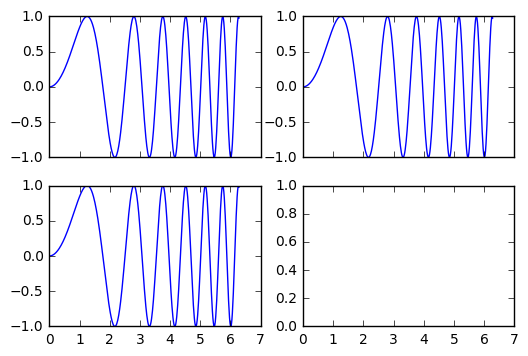

In [52]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)
z = np.vstack([x, y])

fig, axes = plt.subplots(2, 2, sharex='col')
print(axes)

axes[0, 0].plot(x, y)
axes[0, 1].plot(x, y)
axes[1, 0].plot(x, y)

plt.show()